### Generating Text with the Vanilla RNN

In [7]:
# load json and create model
json_file = open('problem1_data/RNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

RNN_model = model_from_json(loaded_model_json)
RNN_model.load_weights("problem1_data/RNN_model.h5")

In [8]:
# load in the weights and show summary
weights_RNN = RNN_model.get_weights()
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Vanilla_RNN_1 (SimpleRNN)   (None, 100, 128)          22144     
                                                                 
 Vanilla_RNN_2 (SimpleRNN)   (None, 64)                12352     
                                                                 
 Dense_layer (Dense)         (None, 44)                2860      
                                                                 
 Softmax_layer (Activation)  (None, 44)                0         
                                                                 
Total params: 37,356
Trainable params: 37,356
Non-trainable params: 0
_________________________________________________________________


Finish the following function that uses a vanilla RNN architecture to generate text, given the weights of the RNN model, a text prompt, and the number of characters to return. The function should be completed by **only using numpy functions**. Use your knowledge of how every weight plays its role in the RNN architecture. Do not worry about the weight extraction part, this is already provided for you. The weight matrix $W_{xh1}$, for example, denotes the weight matrix to go from the input x to the first hidden state layer h1. The hidden states $h_1$ and $h_2$ are initialized to a vector of zeros. 

The embedding of each character has to be done by a one-hot encoding, where you will need the dictionaries defined in the introduction to go from a character to an index position.

In [39]:
def sample_text_RNN(weights, prompt, N):
    '''
    Uses a pretrained RNN to generate text, starting from a prompt, 
    only using the weights and numpy commands
            Parameters:
                    weights (list): Weights of the pretrained RNN model
                    prompt (string): Start of generated sentence
                    N (int): Length of output sentence (including prompt)
            Returns:
                    output_sentence (string): Text generated by RNN
    '''
    # Extracting weights and biases
    # Dimensions of matrices are same format as lecture slides

    # First Recurrent Layer 
    W_xh1 = weights[0].T 
    W_h1h1 = weights[1].T 
    b_h1 = np.expand_dims(weights[2], axis=1)

    # Second Recurrent Layer
    W_h1h2 = weights[3].T
    W_h2h2 = weights[4].T
    b_h2 = np.expand_dims(weights[5], axis=1)

    # Linear (dense) layer
    W_h2y = weights[6].T
    b_y = np.expand_dims(weights[7], axis=1)
    
    # Initiate the hidden states
    h1 = np.zeros((W_h1h1.shape[0], 1))
    h2 = np.zeros((W_h2h2.shape[0], 1))
    
    output_sentence = prompt
    
    for i in range(N - len(prompt)):
        x = np.zeros((W_xh1.shape[1], 1))
        current_char = output_sentence[-1] if output_sentence else ' '
        x[char_to_indices[current_char]] = 1
        
        # Recurrent layers
        h1 = np.tanh(np.dot(W_xh1, x) + np.dot(W_h1h1, h1) + b_h1)
        h2 = np.tanh(np.dot(W_h1h2, h1) + np.dot(W_h2h2, h2) + b_h2)
            
        # Output
        y = np.dot(W_h2y, h2) + b_y
        exp_y = np.exp(y - np.max(y))
        p = exp_y / np.sum(exp_y)
        
        # Sample the next character based on the probability distribution
        next_char_index = np.random.choice(len(p), p=p.flatten())
        next_char = indices_to_char[next_char_index]
        
        # Append the next character to the output sentence
        output_sentence += next_char
        
        # Update the current character
        current_char = next_char
        
    return output_sentence

Test out your function by running the following code cell. Use it as a sanity check that your code is working. The generated text should not be perfect English, but at least you should be able to recognize some words.

In [38]:
print(sample_text_RNN(weights_RNN, 
                      'mrs. oliver looked at herself in the glass. she gave a brief, sideways look', 
                      1000))

mrs. oliver looked at herself in the glass. she gave a brief, sideways lookith could be mrs. celia. "you anywaress. hould said mry. she'd beem see to de a get really as i mest they have know the was she was, combarilden-she macanceding," said mrs. burbef-celinit. anyon't it?" eaplise. the peoplivellytsing. she was"s who llue," said she teven adyt at is wis whem knew, "andicady or something gen," said you hore he heard inttibliwh i'm some to have at-wo mis. ouncearsit. and silved youl them would know it overy," said mrs. oliver. "and it con't know. i didn't lealing really. mrs. oliver hore knows, radddause interventice," said garreling eats exednes mostaly ot soon of owl nwelly ments, ftrause and asked from that there't was pes'abseaply extenssed wight find, you know the om nine, you might quike of them, or somrofios, sure office by my very offeeved her yous she nut mand aso and the deass. i think an adeain--"o" "yes," said mrs. oliver, wasking at. all nid cone to of this and so most se

### Generating Text with the GRU

The code below loads in a pretrained GRU model. The model is set up exactly like in the lecture slides (with sigmoid activation layers for the gates and tanh activation layers in the recurrent layer). The model is trained for only 10 epochs.

In [12]:
# load json and create model
json_file = open('problem1_data/GRU_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

GRU_model = model_from_json(loaded_model_json)
GRU_model.load_weights("problem1_data/GRU_model.h5")

2024-11-25 13:07:47.973854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-25 13:07:47.974542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-25 13:07:47.975093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [13]:
# load in the weights and show summary
weights_GRU = GRU_model.get_weights()
GRU_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               857088    
                                                                 
 dense (Dense)               (None, 44)                22572     
                                                                 
 activation (Activation)     (None, 44)                0         
                                                                 
Total params: 879,660
Trainable params: 879,660
Non-trainable params: 0
_________________________________________________________________


Finish the following function that uses a GRU architecture to generate text, given the weights of the GRU model, a text prompt, and the number of characters to return. The function should be completed by **only using numpy functions**. Use your knowledge of how every weight plays its role in the GRU architecture. Do not worry about the weight extraction part, this is already provided for you. The hidden state $h$ is initialized to a vector of zeros. 

The embedding of each character has to be done by a one-hot encoding, where you will need the dictionaries defined in the introduction to go from a character to an index position.

Note: a slightly different version of the GRU is used, where the candidate state $c_t$ is calculated as:

$$
c_t = \text{tanh} \left(W_{hx} x_t \ + \ \Gamma_t^r \odot (W_{hh} h_{t-1}) \ + \ b_h \right)
$$

In [40]:
# Helper function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sample_text_GRU(weights, prompt, N):
    '''
    Uses a pretrained GRU to generate text, starting from a prompt,
    only using the weights and numpy commands
            Parameters:
                    weights (list): Weights of the pretrained GRU model
                    prompt (string): Start of generated sentence
                    N (int): Total length of output sentence
            Returns:
                    output_sentence (string): Text generated by GRU
    '''
    # Extracting weights and biases
    # Dimensions of matrices are same format as lecture slides
    
    # GRU Layer 
    W_ux, W_rx, W_hx = np.split(weights[0].T, 3, axis = 0)
    W_uh, W_rh, W_hh = np.split(weights[1].T, 3, axis = 0)

    bias = np.sum(weights[2], axis=0)
    b_u, b_r, b_h = np.split(np.expand_dims(bias, axis=1), 3)

    # Linear (dense) layer
    W_y = weights[3].T
    b_y = np.expand_dims(weights[4], axis=1)
    
    # Initiate hidden state
    h = np.zeros((W_hh.shape[0], 1))
    
    output_sentence = prompt
    
    for i in range(N - len(prompt)):
        x = np.zeros((W_ux.shape[1], 1))
        current_char = output_sentence[-1] if output_sentence else ' '
        x[char_to_indices[current_char]] = 1 
        
        
        #update gate
        z_t = sigmoid(np.dot(W_ux, x) + np.dot(W_uh, h) + b_u)
        
        #reset gate
        r_t = sigmoid(np.dot(W_rx, x) + np.dot(W_rh, h) + b_r)
        
        #candidate state
        c_t = np.tanh(np.dot(W_hx, x) + np.dot(W_hh, r_t * h) + b_h)
        
        # Update hidden state h_t
        h = z_t * h + (1 - z_t) * c_t
        
        #output logits w/ softmax
        y = np.dot(W_y, h) + b_y
        exp_y = np.exp(y - np.max(y))
        p = exp_y / np.sum(exp_y)
        
        # Sample the next character
        next_char_index = np.random.choice(len(p), p=p.flatten())
        next_char = indices_to_char[next_char_index]
        
        # Append the next character to the output sentence
        output_sentence += next_char
        
        # Update the current character
        current_char = next_char
        
    return output_sentence

Test out your function by running the following code cell. Use it as a sanity check that your code is working. The generated text should not be perfect English, but at least you should be able to recognize some words.

In [41]:
print(sample_text_GRU(weights_GRU, 
                      'mrs. oliver looked at herself in the glass. she gave a brief, sideways look',
                      1000))

mrs. oliver looked at herself in the glass. she gave a brief, sideways looking evertto a dorlatingrea's of thosieny ot eliege to hadit. "the a genellave in pole wait to to rote thin hemato enchad. ont a rowithin ather agke it bou?" "you well any herstyoul uss abler at, of a mothoug undee, aghin. "newabted abroatht wid heriues, ats tok alorane sterielinglispelis notel, thot, ohing" "ahy ravenicvonit made part of a drewpentin -lied," same that, tory telli hed about," "i's livits onewitatheri'te, he wad, "or can susten, and han a it quite as and st ow woursly stouc you centay in tire." "if toiris you know eve will alower the ore of he sents to awoult ress vertt. bethe  a teremolaboutery elonge thing. toryou all?" "yes that " to any strolle a iepeatte and the was. alifilatin you?" "ahang the agria sotha fele the minute hings, and aboul, or onget ive, i timiritein ores, or in sestanly and a gidla is horsseee sidot elleded, bather and and abeatif thed howely? and all the peoplet notevevee te

### Can Elephants Remember Better?

Perplexity is a measure to quantify how "good" a language model $M$ is, based on a test (or validation) set. The perplexity on a sequence $s$ of characters $a_i$ of size $N$ is defined as:

$$
\text{Perplexity}(M) = M(s)^{(-1/N)} = \left\{p(a_1, \ldots, a_N)\right\}^{(-1/N)} = \left\{p(a_1) \ p(a_2|a_1) \ \ldots \ p(a_N|a_1, \ldots, a_{N-1})\right\}^{(-1/N)}
$$

> The intuition behind this metric is that, if a model assigns a high probability to a test set, it is not surprised to see it (not perplexed by it), which means the model $M$ has a good understanding of how the language works. Hence, a good model has, in theory, a lower perplexity. The exponent $(-1/N)$ in the formula is just a normalizing strategy (geometric average), because adding more characters to a test set would otherwise introduce more uncertainty (i.e. larger test sets would have lower probability). So by introducing the geometric average, we have a metric that is independent of the size of the test set.

When calculating the perplexity, it is important to know that taking the product of a bunch of probabilities will most likely lead to a zero value by the computer. To prevent this, make use of a log-transformation:

$$
\text{Log-Perplexity}(M) = -\frac{1}{N} log\left\{p(a_1, \ldots, a_N)\right\} = -\frac{1}{N} \left\{log \ p(a_1) + \ log \ p(a_2|a_1) + \ \ldots \ + log \  p(a_N|a_1, \ldots, a_{N-1})\right\} 
$$



There are noticeable differences between the text generated by the Vanilla RNN and the GRU models. When running both models multiple times with various prompts, the GRU consistently produces more coherent and contextually relevant continuations, maintaining the narrative flow and reducing repetitive phrases. In contrast, the Vanilla RNN often struggles with maintaining long-term dependencies, leading to repetitive or less meaningful text. This is also evident in the GRU output's punctuation and general sentence length. These differences are expected because GRUs incorporate gating mechanisms that effectively manage and retain important information over longer sequences, addressing the vanishing gradient problem inherent in Vanilla RNNs. As a result, GRUs demonstrate a superior ability to understand and generate complex language patterns, making them more robust for character-based language modeling tasks. It is clear that the GRU has lower perplexity than the RNN.

In [46]:
# Your code here
def sample_text_RNN(weights, prompt, N):
    '''
    Uses a pretrained RNN to generate text, starting from a prompt, 
    only using the weights and numpy commands
            Parameters:
                    weights (list): Weights of the pretrained RNN model
                    prompt (string): Start of generated sentence
                    N (int): Length of output sentence (including prompt)
            Returns:
                    output_sentence (string): Text generated by RNN
    '''
    # Extracting weights and biases
    # Dimensions of matrices are same format as lecture slides

    # First Recurrent Layer 
    W_xh1 = weights[0].T 
    W_h1h1 = weights[1].T 
    b_h1 = np.expand_dims(weights[2], axis=1)

    # Second Recurrent Layer
    W_h1h2 = weights[3].T
    W_h2h2 = weights[4].T
    b_h2 = np.expand_dims(weights[5], axis=1)

    # Linear (dense) layer
    W_h2y = weights[6].T
    b_y = np.expand_dims(weights[7], axis=1)
    
    # Initiate the hidden states
    h1 = np.zeros((W_h1h1.shape[0], 1))
    h2 = np.zeros((W_h2h2.shape[0], 1))
    
    output_sentence = prompt
    log_probs = 0
    
    for i in range(N - len(prompt)):
        x = np.zeros((W_xh1.shape[1], 1))
        current_char = output_sentence[-1] if output_sentence else ' '
        x[char_to_indices[current_char]] = 1
        
        # Recurrent layers
        h1 = np.tanh(np.dot(W_xh1, x) + np.dot(W_h1h1, h1) + b_h1)
        h2 = np.tanh(np.dot(W_h1h2, h1) + np.dot(W_h2h2, h2) + b_h2)
            
        # Output
        y = np.dot(W_h2y, h2) + b_y
        exp_y = np.exp(y - np.max(y))
        p = exp_y / np.sum(exp_y)
        
        if i < len(test_text) - len(prompt):
            actual_next_char = test_text[len(prompt) + i]
            actual_next_char_idx = char_to_indices[actual_next_char]
            prob = p[actual_next_char_idx]
            log_probs += np.log(prob + 1e-9) # avoid log(0)
        
        # Sample the next character based on the probability distribution
        next_char_index = np.random.choice(len(p), p=p.flatten())
        next_char = indices_to_char[next_char_index]
        
        output_sentence += next_char
        current_char = next_char
        
    return output_sentence, log_probs


def sample_text_GRU(weights, prompt, N):
    '''
    Uses a pretrained GRU to generate text, starting from a prompt,
    only using the weights and numpy commands
            Parameters:
                    weights (list): Weights of the pretrained GRU model
                    prompt (string): Start of generated sentence
                    N (int): Total length of output sentence
            Returns:
                    output_sentence (string): Text generated by GRU
    '''
    # Extracting weights and biases
    # Dimensions of matrices are same format as lecture slides
    
    # GRU Layer 
    W_ux, W_rx, W_hx = np.split(weights[0].T, 3, axis = 0)
    W_uh, W_rh, W_hh = np.split(weights[1].T, 3, axis = 0)

    bias = np.sum(weights[2], axis=0)
    b_u, b_r, b_h = np.split(np.expand_dims(bias, axis=1), 3)

    # Linear (dense) layer
    W_y = weights[3].T
    b_y = np.expand_dims(weights[4], axis=1)
    
    # Initiate hidden state
    h = np.zeros((W_hh.shape[0], 1))
    
    output_sentence = prompt
    log_probs = 0

    
    for i in range(N - len(prompt)):
        x = np.zeros((W_ux.shape[1], 1))
        current_char = output_sentence[-1] if output_sentence else ' '
        x[char_to_indices[current_char]] = 1 
        
        
        #update gate
        z_t = sigmoid(np.dot(W_ux, x) + np.dot(W_uh, h) + b_u)
        
        #reset gate
        r_t = sigmoid(np.dot(W_rx, x) + np.dot(W_rh, h) + b_r)
        
        #candidate state
        c_t = np.tanh(np.dot(W_hx, x) + np.dot(W_hh, r_t * h) + b_h)
        
        # Update hidden state h_t
        h = z_t * h + (1 - z_t) * c_t
        
        #output logits w/ softmax
        y = np.dot(W_y, h) + b_y
        exp_y = np.exp(y - np.max(y))
        p = exp_y / np.sum(exp_y)
        
        if i < len(test_text) - len(prompt):
            actual_next_char = test_text[len(prompt) + i]
            actual_next_char_idx = char_to_indices.get(actual_next_char, None)
            if actual_next_char_idx is not None:
                prob = p[actual_next_char_idx]
                log_probs += np.log(prob + 1e-9) # avoid log(0)
        
        # Sample the next character
        next_char_index = np.random.choice(len(p), p=p.flatten())
        next_char = indices_to_char[next_char_index]
        
        # Append the next character to the output sentence
        output_sentence += next_char
        
        # Update the current character
        current_char = next_char
        
    return output_sentence, log_probs

def calculate_perplexity(model_function, weights, prompt, test_sequence):
    generated_text, log_probs = model_function(weights, prompt, len(test_sequence))

    perplexity = np.exp(-np.sum(log_probs) / len(test_sequence))
    return perplexity
                        

prompt_length = 100
prompt = test_text[:prompt_length]                       

perplexity_RNN = calculate_perplexity(sample_text_RNN, weights_RNN, prompt, test_text)
perplexity_GRU = calculate_perplexity(sample_text_GRU, weights_GRU, prompt, test_text)
# Print results
print(f"Perplexity of Vanilla RNN: {perplexity_RNN}")
print(f"Perplexity of GRU: {perplexity_GRU}")

Perplexity of Vanilla RNN: 1130.3767023652094
Perplexity of GRU: 258.70324804219644


## Being the Bard

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a2/Shakespeare.jpg" alt="William" width="200" style="float:left; padding:15px"/>

Transformer models are the current state of the art in many sequence modeling tasks, and the Transformer architecture underlies most Large Language Models (LLMs), including ChatGPT, Llama, Mistral, etc.

In this problem, we will implement a Transformer language model from scratch in `numpy`. You will be provided with the weights of a small, slightly simplified Transformer language model that we trained on the works of Shakespeare. We will walk through implementing each component of the Transformer architecture and ultimately assemble this into a language model that can generate some text in the style of the Bard.

In [48]:
import numpy as np
import pickle
#!pip install tiktoken
import tiktoken
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [52]:
d_model = 512
n_layers = 4
n_heads = 8
d_ff = 1024
vocab_size = 1024
block_size = 128

transformer_model_weights = np.load(f'problem2_model_parameters/model_weights_D{d_model}L{n_layers}H{n_heads}.npy', allow_pickle=True).item()

In [53]:
print('Parameters:')
for key in transformer_model_weights.keys():
    print(f'    {key}')

Parameters:
    word_embedding.weight
    position_embedding.inv_freq
    layers.0.attention.wq.weight
    layers.0.attention.wk.weight
    layers.0.attention.wv.weight
    layers.0.attention.wo.weight
    layers.0.feed_forward.0.weight
    layers.0.feed_forward.2.weight
    layers.1.attention.wq.weight
    layers.1.attention.wk.weight
    layers.1.attention.wv.weight
    layers.1.attention.wo.weight
    layers.1.feed_forward.0.weight
    layers.1.feed_forward.2.weight
    layers.2.attention.wq.weight
    layers.2.attention.wk.weight
    layers.2.attention.wv.weight
    layers.2.attention.wo.weight
    layers.2.feed_forward.0.weight
    layers.2.feed_forward.2.weight
    layers.3.attention.wq.weight
    layers.3.attention.wk.weight
    layers.3.attention.wv.weight
    layers.3.attention.wo.weight
    layers.3.feed_forward.0.weight
    layers.3.feed_forward.2.weight
    fc_out.weight
    fc_out.bias


### Tokenizer

To process text with a neural network model, we need to first tokenize it in order to convert it to a numerical format that the model can understand and process. The tokenizer converts strings into sequences of integer tokens in a fixed vocabulary. There are different ways to do this. For this problem, we trained a custom [Byte-Pair Encoding](https://en.wikipedia.org/wiki/Byte_pair_encoding)  (BPE) tokenizer on Shakespeare text, setting the vocabulary size to 1024. The code below demonstrates how it works.

In [54]:
# load the BPE tokenizer
with open('problem2_model_parameters/bpe1024_enc_full.pkl', 'rb') as pickle_file:
    enc = pickle.load(pickle_file)

In [55]:
# text to tokenize
text = """What's in a name? that which we call a rose
By any other name would smell as sweet;"""

print('Original text:')
print(text)
encoded = enc.encode(text)
print()

print('Encoded:')
print(encoded)
print()

print('Tokens: ')
print([enc.decode([idx]) for idx in encoded])
decoded = enc.decode(encoded)
print()

print('Decoded text:')
print(decoded)

Original text:
What's in a name? that which we call a rose
By any other name would smell as sweet;

Encoded:
[462, 320, 307, 258, 813, 63, 323, 621, 331, 800, 258, 697, 305, 10, 889, 801, 845, 813, 504, 260, 109, 408, 366, 818, 59]

Tokens: 
['What', "'s", ' in', ' a', ' name', '?', ' that', ' which', ' we', ' call', ' a', ' ro', 'se', '\n', 'By', ' any', ' other', ' name', ' would', ' s', 'm', 'ell', ' as', ' sweet', ';']

Decoded text:
What's in a name? that which we call a rose
By any other name would smell as sweet;


### Problem 2.2a: Token Embeddings

After tokenization, we get a sequence of integers that represent the text to processed, with each integer index corresponding to a particular token in the vocabulary (e.g., a word or word-part). The first step in processing this text is to turn it into a vector representation. This is done via a learned embedding look-up table. For each token in the vocabulary $t \in \mathcal{V}$, we learn an embedding $E_t \in {\mathbb R}^d$. A sequence of tokens $(t_1, ..., t_n)$ is transformed to a vector representation by mapping each token to its embedding $(E_{t_1}, ..., E_{t_n}) \in {\mathbb R}^{n \times d}$. This sequence of vectors is what the neural network model ultimately operates over.

In [56]:
def embed_tokens(tokens, params):
    """
    Embed tokens using the input embeddings.

    Args:
        tokens (np.array): array of token indices, shape (n_tokens,)
        params (dict): dictionary containing the model parameters
    """

    # get needed parameters
    embeddings = params['word_embedding.weight'] # shape (vocab_size, d_model)
    # embeddings is a look up table for embeddings, with rows corresponding to token indices
    # i.e., embeddings[token_index] returns the embedding for the token with index token_index

    # look up embeddings
    embedded_tokens = embeddings[tokens]

    return embedded_tokens

In [57]:
embed_tokens(np.array([1, 2, 3]), params=transformer_model_weights)[:3, :5]

array([[-0.4494016 ,  0.8637606 ,  0.64816946, -1.0005027 ,  0.65828127],
       [ 1.1595719 , -0.09202019,  1.4256238 ,  1.7668523 , -1.366581  ],
       [ 0.7071919 ,  0.45128715, -1.1132193 , -0.18074755, -0.36634383]],
      dtype=float32)

Expected answer:

```
array([[-0.4494016 ,  0.8637606 ,  0.64816946, -1.0005027 ,  0.65828127],
       [ 1.1595719 , -0.09202019,  1.4256238 ,  1.7668523 , -1.366581  ],
       [ 0.7071919 ,  0.45128715, -1.1132193 , -0.18074755, -0.36634383]],
      dtype=float32)
```

### Positional Encoding

Transformer models are by-default permutation-equivariant. That is, they don't understand order or position. To make them understand positional information, we need to encode it directly in the token embeddings. One way to do this is to represent each possible position $i$ with its own position embedding ${PE}_i \in \mathbb{R}^{d}$. One way to encode the position of each token is to simply add a positional embedding representing the position of the token.

In the original Transformer paper, the authors propose a particular choice for ${PE}_i \in {\mathbb R}^{d}$ based on sines and cosines with frequencies depending on the position $i$. Since the original proposal, many follow-up works proposed different positional encoding methods aiming to improve performance and length-generalization. In this problem, we'll use the sinusoidal positional encodings of the original Transformer paper.

We provide the code for computing these sinusoidal positional embeddings below. To give some intuition about the structure of the sinusoidal positional embeddings, we also plot a heatmap of the pairwise inner products $\langle PE_i, PE_j \rangle$. We see that that positions that are closer together have more similar positional embeddings, with additional oscillatory behavior on top of that.

Below is an implementation of the positional embeddings. 

In [61]:
def get_sinusoidal_positional_embeddings(sequence_length, dim, base=10000):
    inv_freq = 1.0 / (base ** (np.arange(0, dim, 2) / dim))
    t = np.arange(sequence_length)
    sinusoid_inp = np.einsum("i,j->ij", t, inv_freq)

    sin, cos = np.sin(sinusoid_inp), np.cos(sinusoid_inp)

    emb = np.concatenate((sin, cos), axis=-1)
    # return emb[None, :, :]
    return emb[:, :]

In [63]:
print(pe[:5, :10])

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.84147098  0.8019618   0.76172041  0.72141412  0.68156135  0.64255691
   0.60469402  0.56818322  0.53316844  0.49974046]
 [ 0.90929743  0.95814438  0.98704625  0.9991642   0.99748     0.984703
   0.96322662  0.9351183   0.90213071  0.86572559]
 [ 0.14112001  0.34278182  0.51730572  0.66243612  0.77827252  0.86647672
   0.92964484  0.97083837  0.99325317  0.9999996 ]
 [-0.7568025  -0.54860557 -0.31671543 -0.08168498  0.14153892  0.34315172
   0.51761928  0.66269154  0.77847174  0.8666241 ]]


Explore the positional embeddings by computing the inner-product between all pairs of positional embeddings, and then plotting the similarity matrix as a heat map. Do the results make sense? What are the positional embeddings designed to model? Do they do this effectively? Comment below.

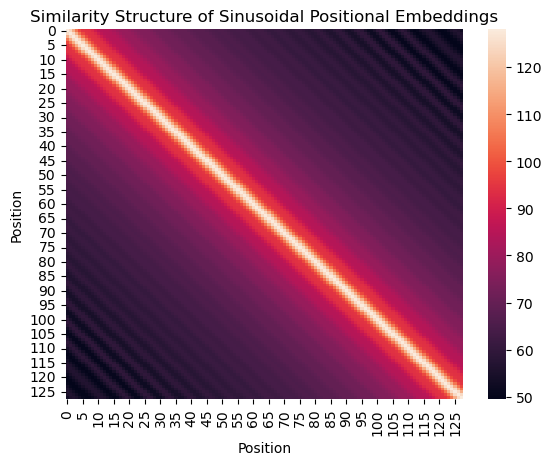

In [64]:
pe = get_sinusoidal_positional_embeddings(128, 256)

pe_similarity = np.dot(pe, pe.T)

sns.heatmap(pe_similarity)
plt.title('Similarity Structure of Sinusoidal Positional Embeddings')
plt.xlabel('Position')
plt.ylabel('Position')
plt.show()

The heatmap of the pairwise inner products of the sinusoidal positional embeddings reveals a clear structure where positions that are closer together exhibit higher similarity, as evidenced by brighter regions along the diagonal. This pattern is a direct consequence of the sinusoidal functions used to generate the embeddings, which ensure that nearby positions have embeddings with similar phase and frequency components. Additionally, the oscillatory behavior in the similarity matrix reflects the multi-frequency nature of the sinusoidal encodings, allowing the model to capture both local and global positional relationships. These embeddings are specifically designed to encode positional information in a way that preserves the order and relative distances between tokens, enabling the Transformer model to effectively utilize sequence order without being inherently aware of it. 

### Multi-Head Attention

The core operation in a Transformer is multi-head attention, sometimes called self-attention. In this problem, we will implement multi-head attention in numpy from scratch, given the trained parameters of the model.

The input is a sequence of vectors $X = (x_1, ..., x_n) \in {\mathbb R}^{n \times d_{model}}$. For each attention head $h \in [n_h]$, the parameters consist of a query projection matrix $W_q^h \in {\mathbb R}^{d_{model} \times d_h}$, a key projection matrix $W_k^h \in {\mathbb R}^{d_{model} \times d_h}$, and a value projection matrix $W_k^h \in {\mathbb R}^{d_{model} \times d_h}$. Here, $d_h$ is the "head dimension", taken to be $d_{model} / n_h$ (to maintain the same dimensionality between the input and output). The algorithm, for each head, is the following:
1. Compute the queries $Q = X W_q^h$, keys $K = X W_k^h$, and values $V = X W_v^h$. Note that the linear maps are applied independently for each token across the embedding dimension (not sequence dimension), such that $Q, K, V \in {\mathbb R}^{n \times d_h}$.
2. Compare the queries and keys via inner products to get an $n \times n$ attention matrix $A = \mathrm{Softmax}(Q K^{\intercal} / \sqrt{d_h}) \in {\mathbb R}^{n \times n}$.
3. Use the attention scores $A$ to select values, producing the output of the self-attention head: $\mathrm{head}_h = A V \in {\mathbb R}^{n \times d_h}$.
We then concatenate the retrieved values across all heads, and apply a final linear map. Putting this all together yields:
$$
\begin{align}
    \mathrm{head}_h &= \mathrm{Softmax}((X W_q^h) (X W_k^h)^{\intercal}/ \sqrt{d_h}) X W_v^h\\
    \mathrm{MultiHeadAttention}(X) &= \mathrm{concat}(\mathrm{head}_1, ..., \mathrm{head}_{n_h}) W_o\\
\end{align}
$$
Note that the matrices $W_q^h$, $W_k^h$, $W_v^h$ are "packed together" across heads when you read in the parameters of the model.

In [65]:
# first, we provide a couple of utility functions

def softmax(x, axis=-1):
    # a stable implementation of the softmax function
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

def apply_presoftmax_causal_mask(attn_scores):
    # apply a causal mask to the attention scores (set the entries above the diagonal to -inf)
    n = attn_scores.shape[-1]
    mask = np.triu(np.ones((n, n)), k=1)
    masked_scores = attn_scores - 1e9 * mask
    return masked_scores

def multi_head_attention(x, params, layer_prefix='layers.0'):
    """
    Compute multi-head self-attention.

    Args:
        x (np.array): input tensor, shape (n, d_model)
        params (dict): dictionary containing the model parameters
        layer_prefix (str): prefix of parameter names corresponding to the layer
        verbose (bool): whether to print intermediate shapes
    """

    # get parameters of multi-head attention layer
    wq = params[f'{layer_prefix}.attention.wq.weight'].T # (d_model, d_model)
    wk = params[f'{layer_prefix}.attention.wk.weight'].T # (d_model, d_model)
    wv = params[f'{layer_prefix}.attention.wv.weight'].T # (d_model, d_model)
    wo = params[f'{layer_prefix}.attention.wo.weight'].T # (d_model, d_model)

    head_dim = d_model // n_heads # dimension of each head
    attn_scale = 1 / math.sqrt(head_dim) # scaling factor for attention scores

    # the wq, wk, wv, wo matrices contain weights for all heads, concatenated
    # first, we split wq, wk, wv, wo into heads
    # note: there are more efficient implementations, but this is more verbose/pedagogical
    wq = wq.reshape(d_model, n_heads, head_dim).transpose(1, 0, 2) # (n_heads, d_model, head_dim)
    wk = wk.reshape(d_model, n_heads, head_dim).transpose(1, 0, 2) # (n_heads, d_model, head_dim)
    wv = wv.reshape(d_model, n_heads, head_dim).transpose(1, 0, 2) # (n_heads, d_model, head_dim)

    head_outputs = []
    for head in range(n_heads):

        # get head-specific parameters (these are the query/key/value projections for this head)
        wqh = wq[head] # (d_model, head_dim)
        wkh = wk[head] # (d_model, head_dim)
        wvh = wv[head] # (d_model, head_dim)

        # compute queries, keys, values
        # your code here
        q = x.dot(wqh) # (n, head_dim)
        k = x.dot(wkh) # (n, head_dim)
        v = x.dot(wvh) # (n, head_dim)

        # compute attention scores
        # your code here
        attn_scores = q.dot(k.T) * attn_scale # (n, n)

        attn_scores = apply_presoftmax_causal_mask(attn_scores)
        attn_weights = softmax(attn_scores, axis=-1) # (n, n)

        # apply attention scores to values
        # your code here
        head_out = attn_weights.dot(v) # (n, head_dim)

        # store the head output
        head_outputs.append(head_out)

    # concatenate all head outputs
    head_outputs = np.concatenate(head_outputs, axis=-1) # (n, d_model)

    # apply output linear map W_o to concatenated head outputs
    output = head_outputs.dot(wo)  # (n, d_model)

    return output

In [66]:
multi_head_attention(np.ones((block_size, d_model)), transformer_model_weights)[:3, :5]

array([[ 0.48334133,  0.19740422, -0.39514927, -0.40647455,  0.4831646 ],
       [ 0.48334133,  0.19740422, -0.39514927, -0.40647455,  0.4831646 ],
       [ 0.48334133,  0.19740422, -0.39514927, -0.40647455,  0.4831646 ]])

Expected output:

```
array([[ 0.48334133,  0.19740422, -0.39514927, -0.40647455,  0.4831646 ],
       [ 0.48334133,  0.19740422, -0.39514927, -0.40647455,  0.4831646 ],
       [ 0.48334133,  0.19740422, -0.39514927, -0.40647455,  0.4831646 ]])

```

### MLP

Each Transformer layer (i.e., block) consists of two operations: 1) (multi-head) self-attention, which enables exchange of information between tokens, and 2) a multi-layer perceptron, which processes each token independently. A Transformer model is essentially just alternating between these two operations. In this problem, we will implement the multi-layer perceptron step. Typically, the MLP at each layer is simply a two-layer (one hidden layer) MLP or Feed Forward Network. In our model, we use a ReLU activation in the hidden layer, though other activations are possible. The same MLP network is applied to each token embedding in the sequence independently. 

Given $X = (x_1, ..., x_n) \in {\mathbb R}^{n \times d_{model}}$, we apply the MLP as follows:

$$\mathrm{MLP}(X) = \mathrm{ReLU}(X W_1) W_2$$

Note that we don't use biases for simplicity.

In [67]:
def relu(x):
    return np.maximum(x, 0)

def mlp(x, params, layer_prefix='layers.0'):
    # get MLP parameters
    w1 = params[f'{layer_prefix}.feed_forward.0.weight'].T # (d_model, d_ff)
    w2 = params[f'{layer_prefix}.feed_forward.2.weight'].T # (d_ff, d_model)

    o = relu(x.dot(w1)).dot(w2) # (n, d_model)

    return o

In [68]:
mlp(np.ones((block_size, d_model)), transformer_model_weights)[:3, :5]

array([[0.06068574, 0.6727857 , 0.20872724, 0.42208509, 0.29517956],
       [0.06068574, 0.6727857 , 0.20872724, 0.42208509, 0.29517956],
       [0.06068574, 0.6727857 , 0.20872724, 0.42208509, 0.29517956]])

Expected output:

```
array([[0.06068574, 0.6727857 , 0.20872724, 0.42208509, 0.29517956],
       [0.06068574, 0.6727857 , 0.20872724, 0.42208509, 0.29517956],
       [0.06068574, 0.6727857 , 0.20872724, 0.42208509, 0.29517956]])
```

### Final Prediction Layer

A Transformer model iteratively applies multi-head attention and MLP layers to process the input. This produces a processed representation of shape $n \times d_{model}$. To make the final prediction (e.g., predict the next token), we need to map the $d_{model}$-dimensional embedding vectors to logits over the output vocabulary. To do this, we simply apply a linear map that maps from $d_{model}$ to $\mathtt{vocab\_size}$.



In [69]:
def prediction_head(x, params):
    # get needed parameters
    w = params['fc_out.weight'].T # (d_model, vocab_size)
    b = params['fc_out.bias'] # (vocab_size,)

    logits = x.dot(w) + b # (n, vocab_size)

    return logits

In [70]:
prediction_head(np.ones((block_size, d_model)), transformer_model_weights)[:3, :5]

array([[ 0.88448969,  0.07200013, -0.67318526, -1.11558351,  0.14410351],
       [ 0.88448969,  0.07200013, -0.67318526, -1.11558351,  0.14410351],
       [ 0.88448969,  0.07200013, -0.67318526, -1.11558351,  0.14410351]])

```
array([[ 0.88448969,  0.07200013, -0.67318526, -1.11558351,  0.14410351],
       [ 0.88448969,  0.07200013, -0.67318526, -1.11558351,  0.14410351],
       [ 0.88448969,  0.07200013, -0.67318526, -1.11558351,  0.14410351]])

```

### Putting it all together: A Full Transformer Language Model

We are now ready to put this all together to assemble our Transformer Language Model. Recall that the Transformer architecture consists of iteratively applying multi-head attention and MLPs. Each time we apply attention or the MLP, we also apply a *residual connection*: $X^{(\ell + 1)} = X^{(\ell)} + F(X^{(\ell)})$. This can be interpreted as a mechanism to enable easy communication between different layers (some people call refer to this idea as the "residual stream"). Real Transformers also include layer normalization in each layer, but we omit this for simplicity in this problem.

The full algorithm is given below:
1. Embed the tokens using the embedding lookup table: $(t_1, ..., t_n) \mapsto (E_{t_1}, ..., E_{t_n}) =: X^{(0)}$
2. Add the positional embeddings: $X^{(0)} \gets X^{(0)} + (PE_1, ..., PE_n)$
3. For each layer $\ell = 1, ..., L$:
    1. Apply Multi-Head Attention: $\tilde{X}^{(\ell)} \gets X^{(\ell-1)} + \mathrm{MultiHeadAttention}(X^{(\ell-1)})$.
    2. Apply the MLP: $X^{(\ell)} \gets \tilde{X}^{(\ell)} + \mathrm{MLP}(\tilde{X}^{(\ell)})$.
4. Compute the logits

In [71]:
def transformer(tokens, params):
    # tokens: (n,) integer array
    # params: dictionary of parameters

    # map tokens to embeddings using embed_tokens
    x = embed_tokens(tokens, params)  # (n, d_model)

    # add positional embeddings
    pe = get_sinusoidal_positional_embeddings(x.shape[0], x.shape[1]) # (n, d_model)
    # your code here
    x = x + pe

    # transformer blocks
    for i in range(n_layers):

        # compute multi-head self-attention and add residual
        # your code here
        attn_out = multi_head_attention(x, params, layer_prefix=f'layers.{i}') # (n, d_model)
        # your code here
        x = x + attn_out

        # compute MLP and add residual
        mlp_out = mlp(x, params, layer_prefix=f'layers.{i}') # (n, d_model)
        # your code here
        x = x + mlp_out

    # compute logits via the prediction_head
    logits = prediction_head(x, params) # (n, vocab_size)

    return logits

In [72]:
transformer([0, 1, 2], params=transformer_model_weights)[:3, :5]

array([[-1.9641349 , -5.12566872, -5.90677718, -5.57889839, -3.85043564],
       [-2.31297379, -4.9703405 , -3.49086668, -5.3996587 , -3.99684942],
       [-2.97001726, -4.84049568, -4.04949194, -4.01892107, -6.03805991]])

Expected Output:

```
array([[-1.96413494, -5.12566872, -5.90677725, -5.57889829, -3.85043572],
       [-2.31297382, -4.97034061, -3.49086669, -5.39965866, -3.99684957],
       [-2.97001738, -4.8404957 , -4.04949199, -4.01892112, -6.03806011]])
```

### Generate some text

Below, we provide some code for generating text from a Transformer language model. The sampling procedure is *autoregressive*. This means that we input some text to the model and it outputs a distribution over next tokens. We sample the next token and append it to the text, then repeat the procedure.

Complete the next token generator, but filling in the missing code below. This uses "temperature" to focus on the more probable tokens in a given context (as the temperature decreases). This results in sampling according to 
$ \mathrm{Softmax}(\mathrm{logits}/T)$ where $T \geq 0$ is the temperature; lower temperature places higher probability on tokens having larger logits. Greedy sampling corresponds to $T=0$, and selects the token with the largest logit.

In [75]:
def generate_with_transformer(prefix_text, params, max_len=128, greedy=False, temperature=0.9):
    # encode seed text
    prefix_tokens = list(enc.encode(prefix_text))

    # initialize generated tokens
    generated_tokens = prefix_tokens

    # generate new tokens
    for i in range(max_len):
        # predict next token
        logits = transformer(generated_tokens, params)
        # logits[-1] corresponds to prediction of the next token
        if greedy:
            next_token = np.argmax(logits[-1])
        else:
            next_token = np.random.choice(len(softmax(logits[-1] / temperature)), p=softmax(logits[-1] / temperature))

        # add next token to generated tokens
        generated_tokens.append(next_token)

    # This converts the tokens to text, using the tiktoken decoder:
    generated_text = enc.decode(generated_tokens)

    return generated_text

In [76]:
prefix_text = """ANTONIO:
Do you not hear me speak?"""

generated_text = generate_with_transformer(prefix_text, transformer_model_weights, greedy=True, max_len=128)
print(generated_text)

ANTONIO:
Do you not hear me speak?

First Citizen:
We cannot

First Citizen:
He that hath done fell, sir, sir, sir, sir, sir, sir, sir, sir,
Which ne'er could the belly answer'd--
Which you,
Which you shall fell'd:
Which you shall tell you'll hear it smile, Iliber,
Which ne'--it it belly taunted head the belly,
MENENIUS:
There answer'd, you'll have lusedup
'
There


In [77]:
prefix_text = """ANTONIO:
Do you not hear me speak?"""

generated_text = generate_with_transformer(prefix_text, transformer_model_weights,
    greedy=False, temperature=0.8, max_len=128)
print(generated_text)

ANTONIO:
Do you not hear me speak?

First Citizen:
If you muthorant eye!

They, we'll hear the belly answer.


Ally tale:
Sir countrymen, being one that art wored!
'er came from the lungs, but even thus--
When you
For, I may make the belly smile
As well as speak--it t'--it tauntingly replied
To the discontented
cons, the dis


In the first case, we are using a greedy approach, so the content lacks coherence and often falls into repetitive patterns, such as the repeated use of "sir," which disrupts the flow and authenticity of the dialogue. When using temperature sampling with a temperature of 0.8, there is slightly more variation and creativity, but the sentences remain fragmented and occasionally nonsensical. This indicates that while the model grasps some stylistic aspects of Shakespeare's works, it struggles with maintaining logical consistency and context. To enhance the quality of the generated text, increasing the model's complexity by adding more layers or attention heads could provide a deeper understanding of language patterns. Additionally, incorporating techniques like layer normalization, better regularization, and training on a larger and more diverse dataset would likely improve coherence and reduce repetitive outputs, leading to more fluent and contextually appropriate generations.